# Example of the `aitlas` toolbox in the context of multi label image classification

This notebook shows a sample implementation of a multi label image classification using the `aitlas` toolbox using the UC merced multi label dataset.

In [12]:
import matplotlib.pyplot as plt
import os
import numpy as np

from itertools import compress
from aitlas.datasets import UcMercedMultiLabelDataset
from aitlas.models import ResNet50MultiLabel
from aitlas.tasks.predict import ImageFolderDataset
from aitlas.visualizations import display_image_labels
from aitlas.transforms import ResizeCenterCropFlipHVToTensor, ResizeCenterCropToTensor
from aitlas.utils import image_loader

## Load the train dataset

In [2]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "num_workers": 4,
    "root": "/media/hdd/UCMerced_multilabels/train"
}
train_dataset = UcMercedMultiLabelDataset(train_dataset_config)

## Show images from the dataset

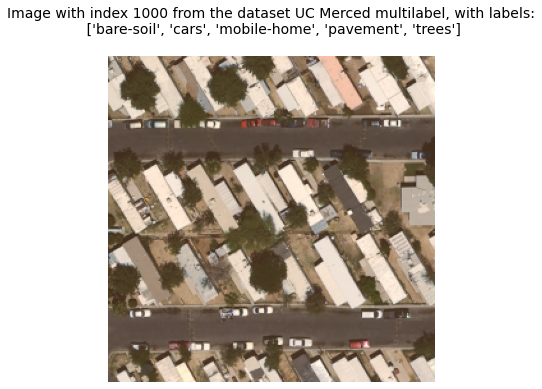

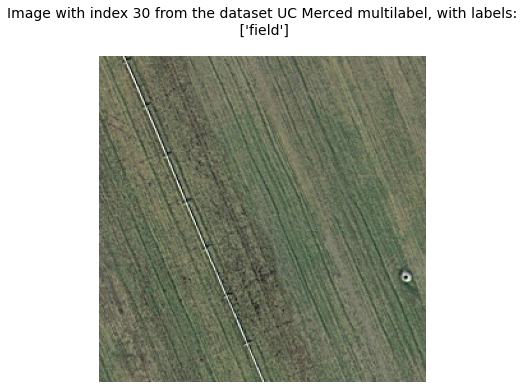

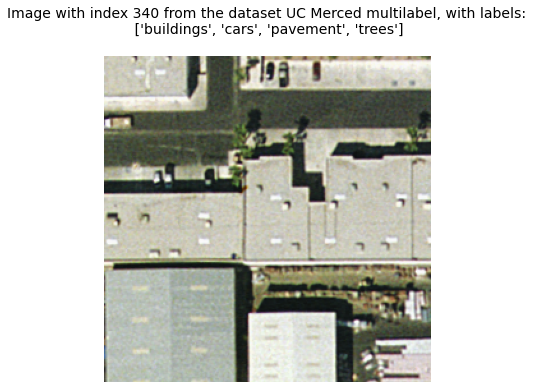

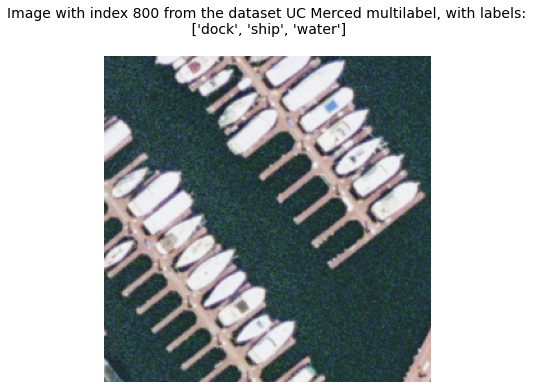

In [3]:
fig1 = train_dataset.show_image(1000)
fig2 = train_dataset.show_image(30)
fig3 = train_dataset.show_image(340)
fig4 = train_dataset.show_image(800)

## Inspect the data

In [4]:
train_dataset.show_samples()

IMAGE\LABEL  airplane  bare-soil  buildings  cars  chaparral  \
0        agricultural70         0          0          0     0          0   
1   sparseresidential32         0          1          1     0          0   
2           chaparral73         0          1          0     0          1   
3   sparseresidential31         0          1          1     1          0   
4              harbor57         0          0          0     0          0   
5          parkinglot02         0          0          0     1          0   
6           buildings43         0          0          1     1          0   
7        storagetanks10         0          1          1     0          0   
8               river60         0          1          0     0          0   
9          parkinglot65         0          0          0     1          0   
10             harbor97         0          0          0     0          0   
11  sparseresidential66         0          0          1     0          0   
12       storagetanks83         0          1          0     1          0   
13        tenniscourt43         0          1          1     0          0   
14          buildings92         0          0          1     0          0   
15             forest09         0          0          0     0          0   
16     mobilehomepark26         0          0          0     1          0   
17           overpass58         0          1          0     1          0   
18  mediumresidential01         0          0          1     1          0   
19   denseresidential32         0          0          1     1          0   

    court  dock  field  grass  mobile-home  pavement  sand  sea  ship  tanks  \
0       0     0      1      0            0         0     0    0     0      0   
1       0     0      0      1            0         1     0    0     0      0   
2       0     0      0      0            0         0     0    0     0      0   
3       0     0      0      0            0         1     0    0     0      0   
4       0     1      0      0            0         0     0    0     1      0   
5       0     0      0      0            0         1     0    0     0      0   
6       0     0      0      0            0         1     0    0     0      0   
7       0     0      0      1            0         1     0    0     0      1   
8       0     0      0      0            0         1     0    0     0      0   
9       0     0      0      0            0         1     0    0     0      0   
10      0     1      0      0            0         0     0    0     1      0   
11      0     0      0      1            0         1     0    0     0      0   
12      0     0      0      0            0         1     0    0     0      1   
13      1     0      0      1            0         1     0    0     0      0   
14      0     0      0      0            0         0     0    0     0      0   
15      0     0      0      0            0         0     0    0     0      0   
16      0     0      0      0            1         1     0    0     0      0   
17      0     0      0      1            0         1     0    0     0      0   
18      0     0      0      1            0         0     0    0     0      0   
19      0     0      0      1            0         1     0    0     0      0   

    trees  water  
0       0      0  
1       1      0  
2       0      0  
3       0      0  
4       0      1  
5       1      0  
6       1      0  
7       0      0  
8       1      1  
9       1      0  
10      0      1  
11      1      0  
12      1      0  
13      1      0  
14      1      0  
15      1      0  
16      0      0  
17      0      0  
18      1      0  
19      1      0

In [5]:
train_dataset.data_distribution_table()

Label Count
1      airplane    78
2     bare-soil   534
3     buildings   526
4          cars   664
5     chaparral    88
6         court    82
7          dock    75
8         field    88
9         grass   747
10  mobile-home    80
11     pavement   987
12         sand   223
13          sea    76
14         ship    77
15        tanks    76
16        trees   766
17        water   147

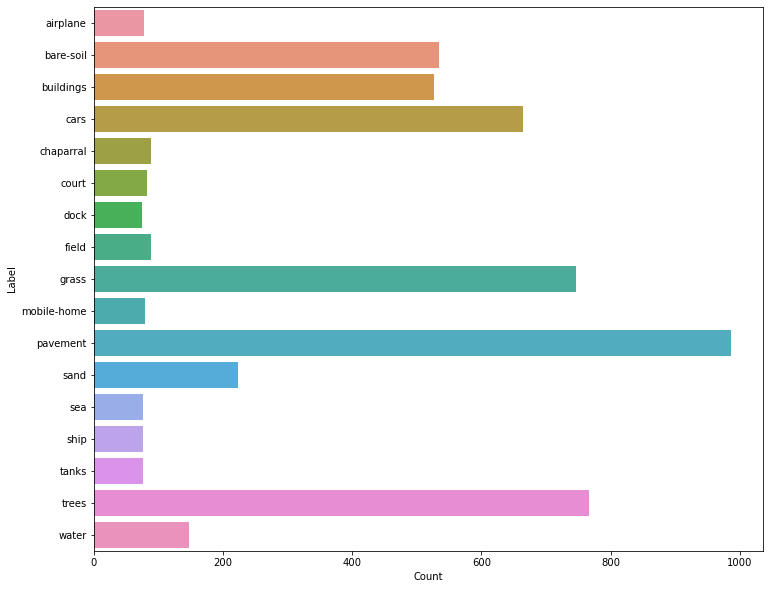

In [6]:
fig = train_dataset.data_distribution_barchart()

## Load data

In [7]:
train_dataset_config = {
    "batch_size": 16,
    "shuffle": True,
    "num_workers": 4,
    "root": "/media/hdd/UCMerced_multilabels/train"
}

train_dataset = UcMercedMultiLabelDataset(train_dataset_config)
train_dataset.transform = ResizeCenterCropFlipHVToTensor() 

test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "root": "/media/hdd/UCMerced_multilabels/test",
    "transforms": ["aitlas.transforms.ResizeCenterCropToTensor"]
}

test_dataset = UcMercedMultiLabelDataset(test_dataset_config)
len(train_dataset), len(test_dataset)

(1600, 500)

## Setup and create the model for training

In [8]:
epochs = 10
model_directory = "/media/ssd/uc_merced_multilabel/experiments/"
model_config = {"num_classes": 17, "learning_rate": 0.0001,"pretrained": True, "threshold": 0.5}
model = ResNet50MultiLabel(model_config)
model.prepare()

## Training and evaluation

In [9]:
model.train_and_evaluate_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    val_dataset=test_dataset,
    run_id='1',
)

2021-04-26 21:49:21,323 INFO Starting training.
training: 100%|██████████| 100/100 [00:10<00:00,  9.64it/s]
2021-04-26 21:49:31,721 INFO epoch: 1, time: 10, loss:  0.24385
testing on train set: 100%|██████████| 100/100 [00:03<00:00, 31.75it/s]
2021-04-26 21:49:35,720 INFO F1_score Micro:0.8927022076544876, F1_score Macro:0.9104870903627006, F1_score Weighted:0.8920171136035101, F1_score per Class:0.9873417721518987, 0.8250950570342206, 0.8763388510223953, 0.8638783269961978, 0.9012345679012347, 0.8611111111111112, 0.9933774834437086, 0.9647058823529412, 0.8651362984218078, 0.8489208633093526, 0.937125748502994, 0.8663594470046082, 0.9934640522875817, 0.9934640522875817, 0.8676470588235294, 0.9030100334448161, 0.93006993006993
testing on validation set: 100%|██████████| 125/125 [00:03<00:00, 38.86it/s]
2021-04-26 21:49:38,942 INFO F1_score Micro:0.8532194079951175, F1_score Macro:0.8625796370046521, F1_score Weighted:0.8511553324434821, F1_score per Class:0.9777777777777777, 0.763532763

testing on validation set: 100%|██████████| 125/125 [00:01<00:00, 86.66it/s]
2021-04-26 21:51:07,861 INFO F1_score Micro:0.8935665579602728, F1_score Macro:0.9321345976530075, F1_score Weighted:0.8945898779110444, F1_score per Class:1.0, 0.766497461928934, 0.9187499999999998, 0.88, 0.9629629629629629, 0.9777777777777777, 1.0, 0.9333333333333333, 0.8898678414096916, 0.9523809523809523, 0.917057902973396, 0.8827586206896552, 1.0, 1.0, 0.9090909090909091, 0.8833333333333334, 0.9724770642201834
training: 100%|██████████| 100/100 [00:10<00:00,  9.72it/s]
2021-04-26 21:51:18,149 INFO epoch: 8, time: 11, loss:  0.05504
testing on train set: 100%|██████████| 100/100 [00:03<00:00, 31.99it/s]
2021-04-26 21:51:21,281 INFO F1_score Micro:0.9727852852852852, F1_score Macro:0.9835265975635522, F1_score Weighted:0.9729397716455376, F1_score per Class:1.0, 0.9442922374429225, 0.9838249286393911, 0.9627329192546583, 0.9943502824858756, 1.0, 1.0, 0.9942857142857142, 0.9543408360128618, 0.987341772151898

## Predictions

2021-04-26 21:53:06,933 INFO Loading checkpoint /media/ssd/uc_merced_multilabel/experiments/checkpoint.pth.tar
2021-04-26 21:53:07,117 INFO Loaded checkpoint /media/ssd/uc_merced_multilabel/experiments/checkpoint.pth.tar at epoch 11
running prediction: 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]


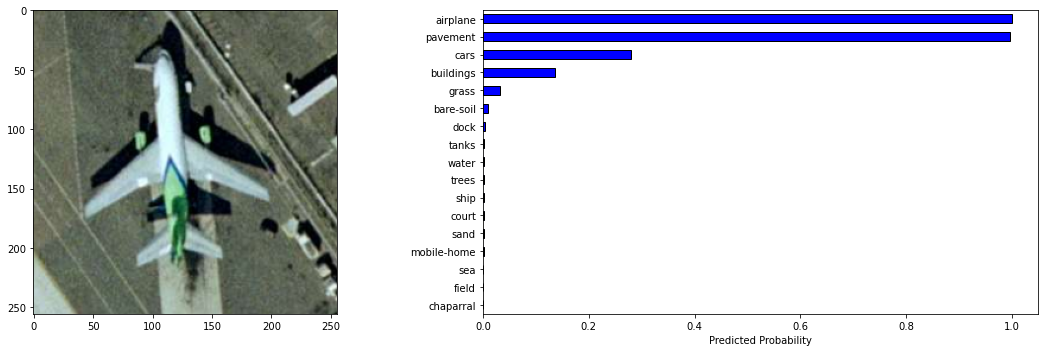

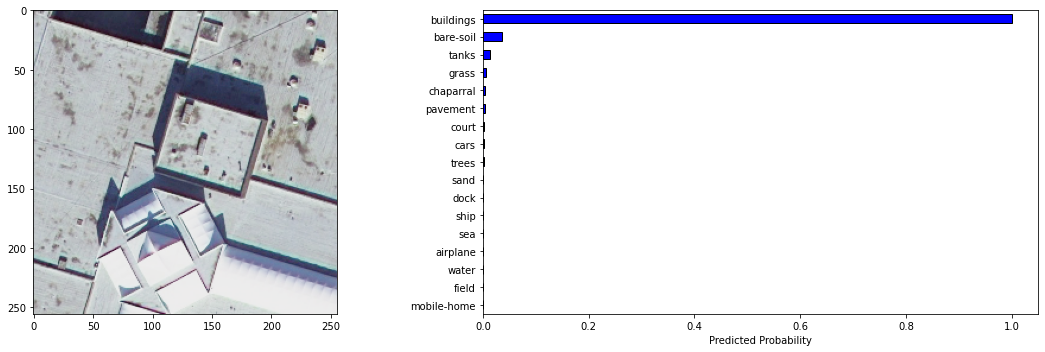

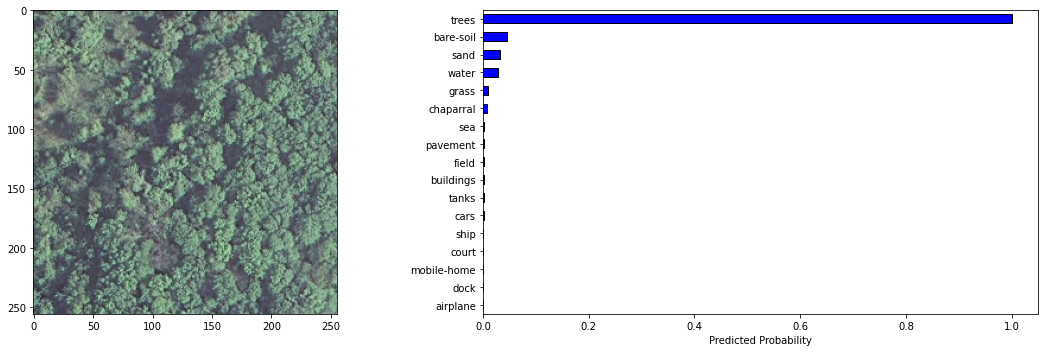

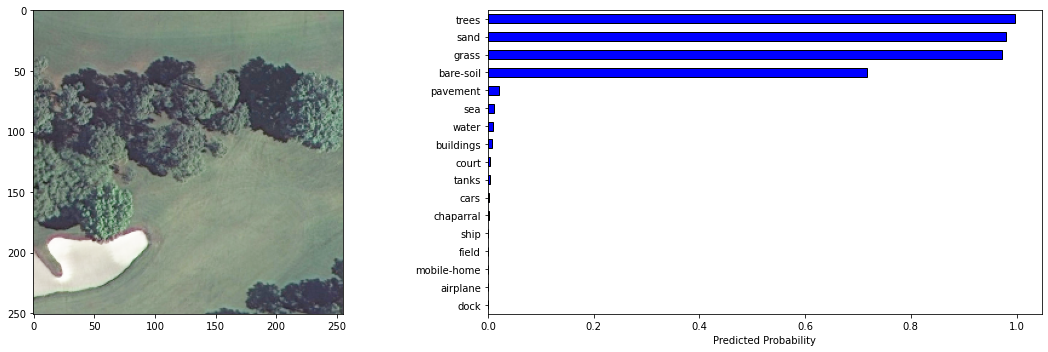

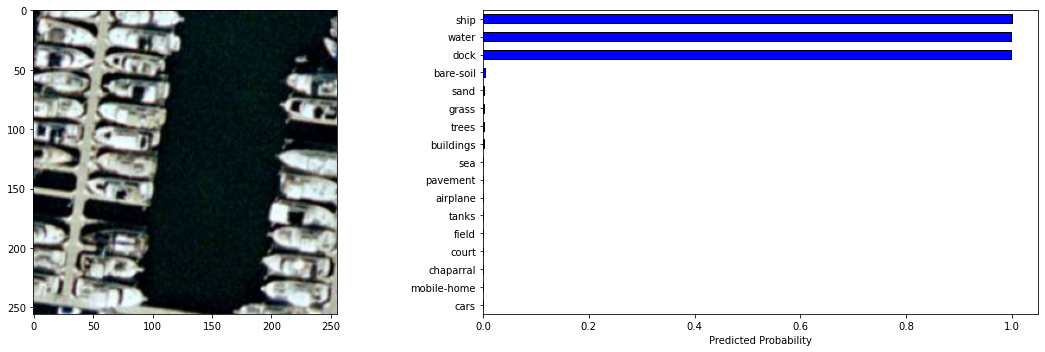

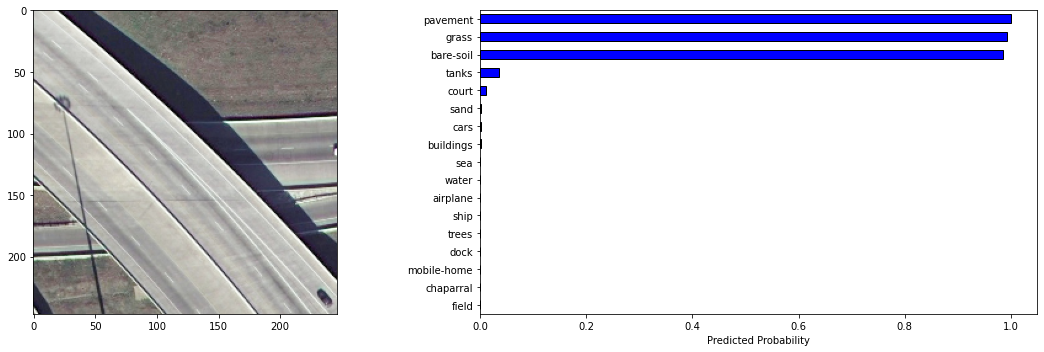

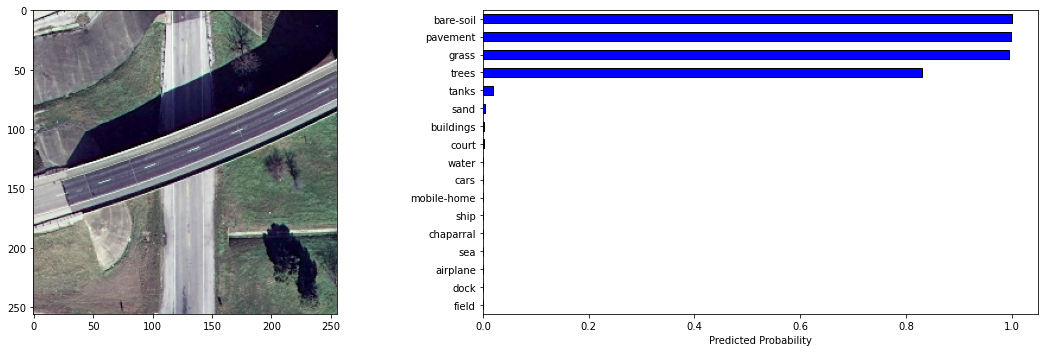

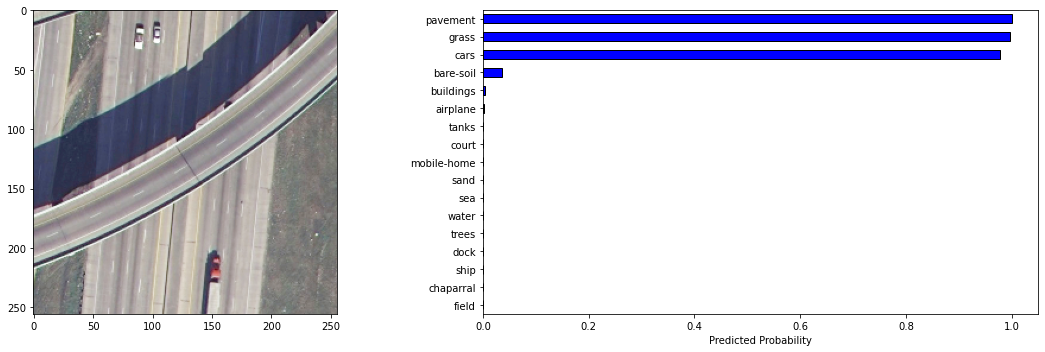

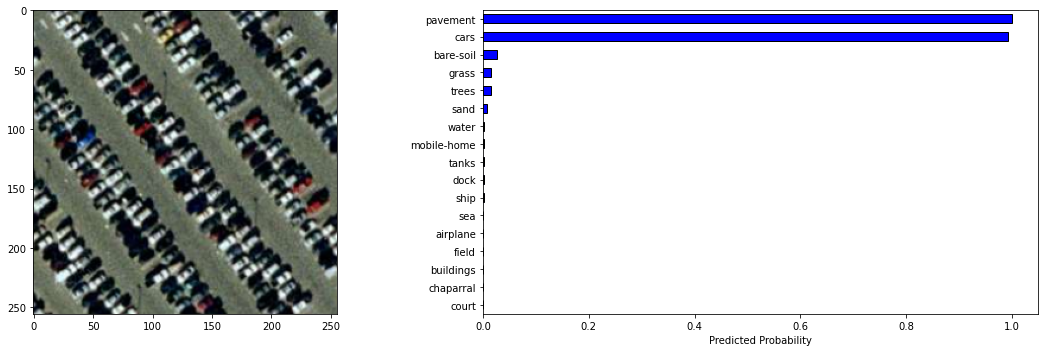

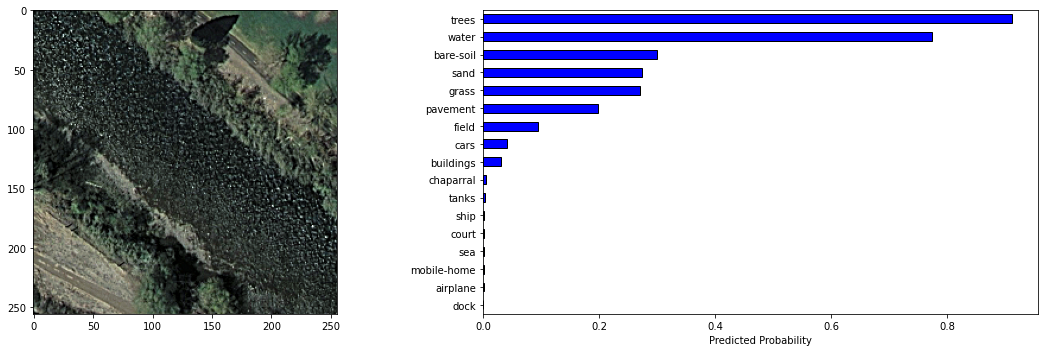

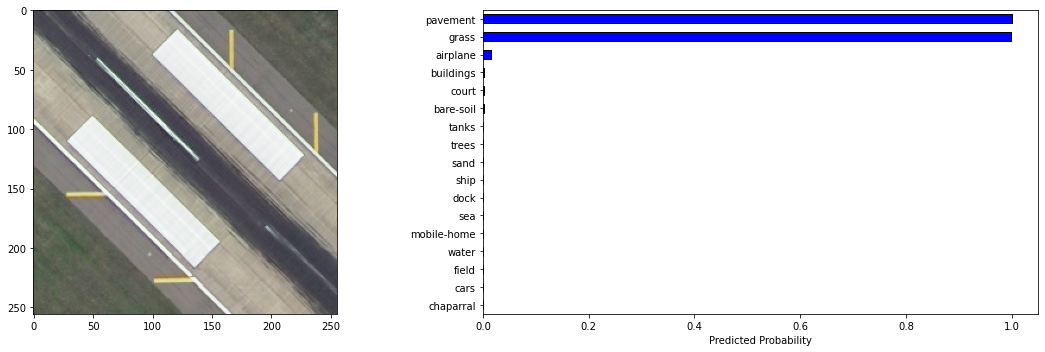

In [13]:
# run predictions
model_path = "/media/ssd/uc_merced_multilabel/experiments/checkpoint.pth.tar"
labels = UcMercedMultiLabelDataset.labels
model.load_model(model_path)
images = ImageFolderDataset("/media/ssd/uc_merced_multilabel/predict/", 
                            labels, ["aitlas.transforms.ResizeCenterCropToTensor"])
results = "/media/ssd/uc_merced_multilabel/experiments/results"
y_true, y_pred, y_prob = model.predict(dataset=images,)
# plot predictions
for i, image_path in enumerate(images.data):
    plot_path = os.path.join(results, f"{images.fnames[i]}_plot.png")
    display_image_labels(
        image_path,
        y_true[i],
        y_pred[i],
        y_prob[i],
        labels,
        plot_path,
    )

array(['buildings'], dtype='<U11')

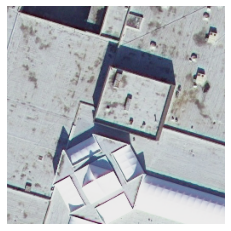

In [14]:
image = image_loader('/media/ssd/uc_merced_multilabel/predict/buildings98.tif')
plt.imshow(image)
plt.axis('off')
transform = ResizeCenterCropToTensor()
y_true, y_pred, y_prob = model.predict_image(image, transform)
np.array(labels)[tuple(y_pred)]